# Observations
### 1. Clean up exception handling- now working, but reduces city total to less than 500
### 2. Multiple API calls to get to 500
### 3. Ensuring no repeat cities (lat and longs in the ocean that are close could lead to the same nearest city)- COMPLETED- now ensure that you get 500 cities in list
### maybe hit API for more than 500 samples then, once more than 500 in dataframe, take sample of 500 cities
### 4. Write observations

In [102]:
# import dependencies and wrappers
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import openweathermapy.core as owm
from config import api_key
import random
from citipy import citipy
from urllib.error import HTTPError

In [103]:
# create empty lists for latitude and longitude
lat = []
lng = []

# use random integers to populate the lat and lng lists
for x in range (1500):
    y = round(random.uniform(-90,90), 6)
    lat.append(y)
    z = round(random.uniform(-180,180),6)
    lng.append(z)
    
# zip the lat and lng lists together to create a list of coordinates
coords = list(zip(lat, lng))

In [104]:
# create empty list for cities
cities = []

# find the nearest city for each 
for coord in coords:
    lat, lng = coord
    nearest_city = citipy.nearest_city(lat, lng)
    if nearest_city not in cities:
        cities.append (nearest_city)

# find the city name and country code for each city
city_names = []
country_codes = []
for city in cities:
    country_code = city.country_code
    country_codes.append(country_code)
    name = city.city_name
    city_names.append(name)
    
len(city_names)

603

In [105]:
# create dataframe and add columns to be later populated
city_df = pd.DataFrame({"City": city_names, "Country Code": country_codes})
city_df["Latitude"]= ""
city_df["Longitude"] = ""
city_df["Temperature"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""

city_df

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,san patricio,mx,,,,,,
1,kapaa,us,,,,,,
2,hermanus,za,,,,,,
3,tasiilaq,gl,,,,,,
4,atuona,pf,,,,,,
5,saint-pierre,pm,,,,,,
6,new norfolk,au,,,,,,
7,bluff,nz,,,,,,
8,yar-sale,ru,,,,,,
9,mezen,ru,,,,,,


In [106]:
# set parameters for owm wrapper
settings = {"units": "imperial", "appid": api_key}
base_url = "api.openweathermap.org/data/2.5/weather?"

# iterate through rows of dataframe, populating it with data from owm api
# add in exception handling in case city from citipy does not appear in owm
for index, row in city_df.iterrows():
    city = row['City']
    try:
        city_weather = owm.get_current(city, **settings)
        city_df.loc[index, 'Latitude'] = city_weather['coord']['lat']
        city_df.loc[index, 'Longitude'] = city_weather['coord']['lon']
        city_df.loc[index, 'Temperature'] = city_weather['main']['temp']
        city_df.loc[index, 'Humidity'] = city_weather['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = city_weather['clouds']['all']
        city_df.loc[index, 'Wind Speed'] = city_weather['wind']['speed']
    except HTTPError:
        print(f"{city} not found. Skipping...")

illoqqortoormiut not found. Skipping...
taolanaro not found. Skipping...
chikoy not found. Skipping...
lolua not found. Skipping...
nizhneyansk not found. Skipping...
korla not found. Skipping...
rawah not found. Skipping...
toliary not found. Skipping...
balykshi not found. Skipping...
saryshagan not found. Skipping...
sentyabrskiy not found. Skipping...
barentsburg not found. Skipping...
tumannyy not found. Skipping...
jiaojiang not found. Skipping...
labutta not found. Skipping...
saleaula not found. Skipping...
maimon not found. Skipping...
inderborskiy not found. Skipping...
vaitupu not found. Skipping...
attawapiskat not found. Skipping...
kamenskoye not found. Skipping...
yingzhong not found. Skipping...
bengkulu not found. Skipping...
amderma not found. Skipping...
choucheng not found. Skipping...
araguatins not found. Skipping...
ndele not found. Skipping...
saint-pacome not found. Skipping...
stornoway not found. Skipping...
belushya guba not found. Skipping...
burica not fou

## Populated City Dataframe

In [119]:
city_df['Latitude'].replace('', np.nan, inplace=True)
city_df.dropna(axis = 0, how = 'any', inplace = True)
city_df.reset_index(drop = True, inplace = True)
city_df.index = np.arange(1, len(city_df) + 1)
city_df.to_csv('city_df.csv', index = None, header = True)
city_df.head()

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
1,san patricio,mx,-26.98,-56.83,81.46,89,68,2.91
2,kapaa,us,22.08,-159.32,75.92,73,40,4.7
3,hermanus,za,-34.42,19.24,58.29,83,8,4.25
4,tasiilaq,gl,65.61,-37.64,23,62,92,18.34
5,atuona,pf,-9.80,-139.03,81.6,99,0,17.22


In [108]:
for index, row in city_df.iterrows():
    city = row["City"]
    print(f'City #{index}: {city}')
    print(f'url: {base_url}units=Imperial&APPID={api_key}&q={city}')

City #1: san patricio
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=san patricio
City #2: kapaa
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=kapaa
City #3: hermanus
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=hermanus
City #4: tasiilaq
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=tasiilaq
City #5: atuona
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=atuona
City #6: saint-pierre
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=saint-pierre
City #7: new norfolk
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=new norfolk
City #8: bluff
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc

## Latitude vs Temperature Scatter Plot

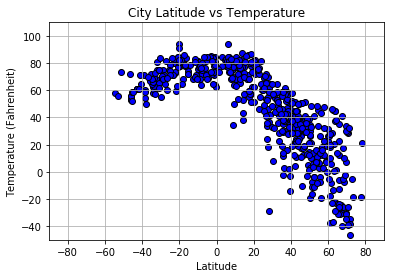

In [109]:
# create scatter plot from dataframe, add appropriate labels and limits, save figure
plt.scatter(city_df["Latitude"], city_df["Temperature"], facecolors = "blue", edgecolors = "black")
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-50,110)
plt.savefig("lat_temp.png", bbox_inches = "tight")

## Latitude vs Humidity Scatter Plot

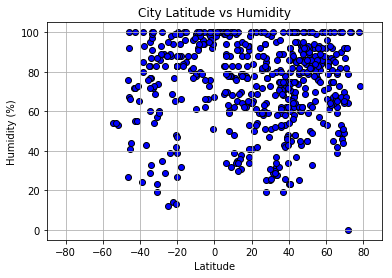

In [110]:
# create scatter plot from dataframe, add appropriate labels and limits, save figure
plt.scatter(city_df["Latitude"], city_df["Humidity"], facecolors = "blue", edgecolors = "black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-5,105)
plt.savefig("lat_hmdty.png", bbox_inches = "tight")

## Latitude vs Cloudiness Scatter Plot

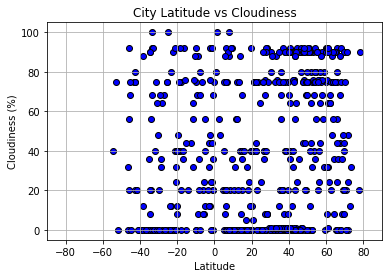

In [111]:
# create scatter plot from dataframe, add appropriate labels and limits, save figure
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], facecolors = "blue", edgecolors = "black")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-5,105)
plt.savefig("lat_cloud.png", bbox_inches = "tight")

## Latitude vs Wind Speed Scatter Plot

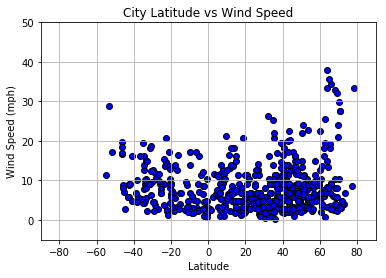

In [114]:
# create scatter plot from dataframe, add appropriate labels and limits, save figure
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], facecolors = "blue", edgecolors = "black")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-5,50)
plt.savefig("lat_wind.png", bbox_inches = "tight")